#Import des données

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
!kaggle datasets download -d lexset/synthetic-asl-alphabet
!unzip \*.zip && rm *.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Train_Alphabet/U/6f3439aa-c9f3-4279-830c-e7b417425835.rgb_0000.png  
  inflating: Train_Alphabet/U/6fc70b21-eb34-42e6-8fa5-368a753a311e.rgb_0000.png  
  inflating: Train_Alphabet/U/700d1cf4-d43f-4d04-ba14-bbb6e9273c38.rgb_0000.png  
  inflating: Train_Alphabet/U/703451c9-380e-41a3-962e-0ef7290f04ec.rgb_0000.png  
  inflating: Train_Alphabet/U/7068eb2d-4d24-4a05-bddf-63fc4e296005.rgb_0000.png  
  inflating: Train_Alphabet/U/706cde46-580e-42d7-8752-2a751d4a2d1a.rgb_0000.png  
  inflating: Train_Alphabet/U/70a03f73-8d9b-48e1-b7d2-d1269fe44efc.rgb_0000.png  
  inflating: Train_Alphabet/U/70b8a34d-9529-4ed3-9570-cdf55ae9659e.rgb_0000.png  
  inflating: Train_Alphabet/U/70ddd4cc-3a15-4b37-bd9d-ea70752e74bb.rgb_0000.png  
  inflating: Train_Alphabet/U/71730f20-7e4b-4dcb-8987-a162076760a0.rgb_0000.png  
  inflating: Train_Alphabet/U/71f6eadc-d5ce-44b0-b98b-2174744a81d7.rgb_0000.png  
  inflating: Train_A

#Création du dataset ( = conversion)

In [ ]:
# On fait tous nos imports

import cv2                    # pour la manipulation d'image
from glob import glob         # pour manipuler plusieurs fichiers d'un coup
import numpy                  # pour avoir accès à davantage de fonctions mathématiques
from tqdm import tqdm         # pour afficher la progression des opérations
import tensorflow             # Nécessaire pour les réseaux de neurones
from tensorflow import keras  # Nécessaire pour les réseaux de neurones

numpy.set_printoptions(threshold=numpy.inf) # On précise comment les nombres à virgules doivent s'afficher

In [ ]:
# On crée nos tableaux X_train, Y_train, X_test et Y_test !

X_train = []  # Notre liste d'images utilisées pour l'ENTRAINEMENT
Y_train = []  # Le chiffre correspondant à chaque image pour l'ENTRAINEMENT
X_test = []   # Notre liste d'images utilisées pour le TEST
Y_test = []   # Le chiffre correspondant à chaque image de TEST
images_test = [] # Contiendra une copie de la liste d'images de test (non modifiées)

In [ ]:
# On va donc remplir nos tableaux X_train et Y_train
# Pour cela, on commence avec le dossier "cats"

alphabet = ["A", "B","Blank", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
numeros = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


for numero_actuel in numeros :
  lettre_actuelle = alphabet[numero_actuel]
  for chemin in tqdm(glob("./Train_Alphabet/"+lettre_actuelle+"/*")):
      image = cv2.imread(chemin)          # ...on ouvre l'image (pour pouvoir la modifier)
      image = cv2.resize(image, (64,64))  # on la redimensionne (64 x 64 pixels)
      image = image.astype("float32")     # on convertit l'image en un tableaux de nombres à virgule
      image /= 255                        # qui sera divisé par 255
      X_train.append(image)               # on ajoute l'image ainsi convertie à X_train
      Y_train.append(numero_actuel)                   # on ajoute le chiffre correspondant à Y_train (0 = chat, 1 = chien)


  # Il faut aussi remplir les tableaux X_test et Y_test
  # Pour cela, on commence avec le dossier "cats"
  for chemin in tqdm(glob("./Test_Alphabet/"+lettre_actuelle+"/*")):
    print(affichage_nombre)
    affichage_nombre += 1
    image = cv2.imread(chemin)          # ...on ouvre l'image (pour pouvoir la modifier)
    images_test.append(image)
    image = cv2.resize(image, (64,64))  # on la redimensionne (64 x 64 pixels)
    image = image.astype("float32")     # on convertit l'image en un tableaux de nombres à virgule
    image /= 255                        # qui sera divisé par 255
    X_test.append(image)               # on ajoute l'image ainsi convertie à X_train
    Y_test.append(numero_actuel)                  # on ajoute le chiffre correspondant à Y_train (0 = chat, 1 = chien)
print(numero_actuel)


 76%|███████▋  | 688/900 [00:05<00:01, 118.54it/s]

In [ ]:
X_train = numpy.array(X_train)                # On convertit X_train en un tableau
Y_train = keras.utils.to_categorical(Y_train) # On convertit Y_train en Catégorie

X_test = numpy.array(X_test)                  # On convertit X_test en un tableau
Y_test = keras.utils.to_categorical(Y_test)   # On convertit Y_test en Catégorie

# Création du modèle

In [ ]:
# Les imports nécessaires
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# On crée notre modèle, en plusieurs couches

# Couche 1
model = Sequential()
model.add(Conv2D(64,(2,2), activation="relu", input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(2,2), activation="relu"))
model.add(Conv2D(32,(2,2), activation="relu"))
model.add(MaxPooling2D((2,2)))

# Couche 2
model.add(Flatten())

# Couche 3
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))

# Couche 4 (finale)
model.add(Dense(27,activation="softmax"))

# On peut afficher un résumé de notre modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        8224      
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0

#Compilation, entraînement

In [ ]:
# On compile et sauvegarde notre modèle

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, Y_train, batch_size=20, epochs=20, verbose=1, validation_data=(X_test, Y_test))
model.save("cats_and_dogs.h5")

Epoch 1/20
1215/1215 [==============================] - 19s 6ms/step - loss: 1.8648 - accuracy: 0.4365 - val_loss: 0.6376 - val_accuracy: 0.8111
Epoch 2/20
1215/1215 [==============================] - 7s 6ms/step - loss: 0.4316 - accuracy: 0.8638 - val_loss: 0.3009 - val_accuracy: 0.9093
Epoch 3/20
1215/1215 [==============================] - 7s 6ms/step - loss: 0.2378 - accuracy: 0.9253 - val_loss: 0.2425 - val_accuracy: 0.9326
Epoch 4/20
1215/1215 [==============================] - 8s 6ms/step - loss: 0.1562 - accuracy: 0.9493 - val_loss: 0.2373 - val_accuracy: 0.9285
Epoch 5/20
1215/1215 [==============================] - 7s 5ms/step - loss: 0.1135 - accuracy: 0.9635 - val_loss: 0.2004 - val_accuracy: 0.9470
Epoch 6/20
1215/1215 [==============================] - 7s 5ms/step - loss: 0.0858 - accuracy: 0.9721 - val_loss: 0.1635 - val_accuracy: 0.9515
Epoch 7/20
1215/1215 [==============================] - 7s 6ms/step - loss: 0.0623 - accuracy: 0.9808 - val_loss: 0.1703 - val_accuracy

#Test (prédiction)

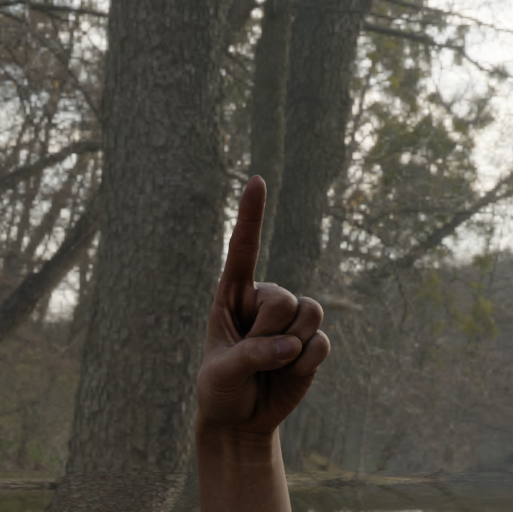

#######################################################
Pour cette image, la prediction est : 
Z
#######################################################


In [ ]:
# IMPORT #
import keras

from keras.models import Sequential, load_model
from keras.layers import Dense
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random

# Charger le réseau de neurones 
model = load_model("cats_and_dogs.h5")

# Ouvrir l'image - en spécifiant directement un fichier
#nom_image = ".jpg"
#image = cv2.imread(nom_image, cv2.IMREAD_COLOR)

# Ouvrir l'image - en en sélectionnant une au hasard dans le dossier de test
num = random.randint(0, len(images_test))           # On récupère un numéro aléatoire entre 0 et 9999
image = images_test[num]                            # On récupère l'image correspondante

# On redimensionne l'image et on la convertit en tableau
input = cv2.resize(image, (64,64))
input = numpy.array(input)

# Reshape en une ligne
input = input.reshape((1,64,64,3))

# passer en float32
input = input.astype("float32")

# diviser par 255
input /= 255

# prédire
prediction = model.predict(input)
prediction = numpy.argmax(prediction)

cv2_imshow(image)
# Afficher prédiction
resultats = ["A", "B","Blank", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
print("#######################################################")
print("Pour cette image, la prediction est : ")
print(resultats[prediction])
print("#######################################################")